<a href="https://colab.research.google.com/github/ronan99/FruitQuality/blob/master/Pascal_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import keras
from keras import regularizers, optimizers

Using TensorFlow backend.


In [0]:
from google.colab import files
import os
import zipfile

if not os.path.exists("/content/kaggle.json"):
  f= open("kaggle.json","w+")
  f.write("{\"username\":\"ronan99\",\"key\":\"1c0a53b3f270310914936fea6801b644\"}")
  f.close()

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
import shutil



-rw-r--r-- 1 root root 63 Aug 26 16:01 kaggle.json
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
100% 1.78G/1.79G [00:20<00:00, 95.3MB/s]
100% 1.79G/1.79G [00:20<00:00, 95.6MB/s]


In [0]:
if not os.path.exists("/content/fruits-fresh-and-rotten-for-classification"):
  os.makedirs("/content/fruits-fresh-and-rotten-for-classification")
os.rename('/content/fruits-fresh-and-rotten-for-classification.zip','/content/fruits-fresh-and-rotten-for-classification/fruits-fresh-and-rotten-for-classification.zip')

os.chdir('/content/fruits-fresh-and-rotten-for-classification')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [6]:



img_width, img_height = 150, 150
train_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/train'
validation_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/test'

nb_train_samples = 10901
nb_validation_samples = 2698
epochs = 40
batch_size = 32
if K.image_data_format() == 'wa':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='binary'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [7]:
classifier = Sequential()

classifier.add(Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(80, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(80, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.25))

classifier.add(Dense(units = 6, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

W0826 16:03:51.989228 139726384633728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 16:03:52.027961 139726384633728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 16:03:52.035404 139726384633728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 16:03:52.061475 139726384633728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0826 16:03:52.100331 139726384633728 deprecation_wrapp

In [8]:

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
# this is the augmentation configuration we will use for training
hist = classifier.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50
)



W0826 16:04:14.263256 139726384633728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
340/340 [==============================] - 62s 183ms/step - loss: 0.7814 - acc: 0.7004 - val_loss: 0.3506 - val_acc: 0.8832
Epoch 2/50
340/340 [==============================] - 54s 159ms/step - loss: 0.3583 - acc: 0.8770 - val_loss: 0.2231 - val_acc: 0.9314
Epoch 3/50
340/340 [==============================] - 53s 155ms/step - loss: 0.2438 - acc: 0.9133 - val_loss: 0.1910 - val_acc: 0.9284
Epoch 4/50
340/340 [==============================] - 53s 155ms/step - loss: 0.2102 - acc: 0.9265 - val_loss: 0.2133 - val_acc: 0.9216
Epoch 5/50
340/340 [==============================] - 53s 154ms/step - loss: 0.1708 - acc: 0.9405 - val_loss: 0.1279 - val_acc: 0.9565
Epoch 6/50
340/340 [==============================] - 52s 154ms/step - loss: 0.1516 - acc: 0.9494 - val_loss: 0.1271 - val_acc: 0.9550
Epoch 7/50
340/340 [==============================] - 52s 153ms/step - loss: 0.1150 - acc: 0.9594 - val_loss: 0.0868 - val_acc: 0.9726
Epoch 8/50
340/340 [==============================] - 5

In [9]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 40)      1120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 80)        80080     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 120)       86520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 120)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 120)       0         
__________

In [0]:
model = Sequential()

model.add(Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(80, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(120, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [0]:
histModel = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=5
)

Epoch 1/5
340/340 [==============================] - 54s 160ms/step - loss: 0.7904 - acc: 0.7003 - val_loss: 0.4645 - val_acc: 0.8162
Epoch 2/5
 38/340 [==>...........................] - ETA: 33s - loss: 0.4303 - acc: 0.8429

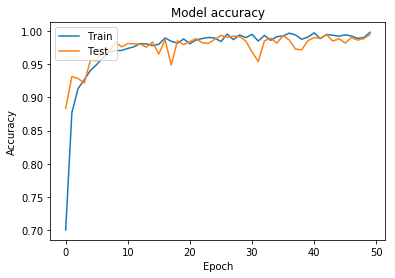

In [10]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
print(train_generator[1][1])

In [0]:
from PIL import Image
import pprint


In [0]:
import cv2
import numpy as np


def imgReturn(path):
  img = Image.open(path)
  img = img.resize((150,150))
  img = np.array(img).astype(np.float32)[None,:,:,:]
  if(img.shape[3]==3):
    img = np.reshape(img,[1,150,150,3])
    return img
  return img

In [25]:
path =  '/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenapples'
for file in os.listdir(path):
  testImg = imgReturn(path+'/'+file)
  if(testImg.shape[3]==3):
    predict = classifier.predict(testImg)
    print(np.argmax(predict[0]))
    
  
  

3
3
3
3
3
3
0
3
3
2
3
3
3
3
2
3
3
3
3
3
2
3
0
3
0
3
3
2
2
3
3
3
2
2
3
0
3
2
2
3
3
3
3
3
3
3
3
3
3
2
0
5
3
2
1
2
0
3
2
2
3
3
3
3
2
1
3
2
3
2
3
2
0
1
2
0
3
0
3
3
3
2
2
3
3
3
0
0
3
3
3
2
3
5
2
2
2
3
3
3
2
2
3
2
3
3
3
3
2
3
0
3
2
3
3
3
3
3
3
3
2
2
2
3
2
0
3
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
0
3
3
2
3
3
3
3
5
3
3
3
3
3
3
3
2
3
3
2
2
2
3
2
3
3
3
3
2
2
3
3
2
3
3
2
3
2
5
3
3
3
3
3
3
2
2
3
2
3
3
3
3
2
3
3
3
3
3
3
0
3
2
3
3
3
3
3
3
0
3
3
3
3
2
2
3
2
2
3
2
3
2
2
2
0
2
0
3
3
0
2
0
3
3
2
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
2
3
3
2
3
2
3
3
0
3
2
3
3
0
3
2
2
3
2
2
2
2
2
3
3
3
3
3
3
3
3
2
3
3
3
3
2
3
3
3
0
2
3
3
3
2
3
3
3
3
3
2
3
3
2
2
0
2
5
3
2
0
2
0
2
3
3
3
2
5
2
0
3
3
0
3
3
3
0
3
3
3
3
2
3
2
3
2
3
3
3
3
2
2
3
5
0
2
3
2
2
0
3
3
2
3
3
2
3
3
3
3
3
3
2
2
3
3
3
3
3
3
2
3
0
5
3
3
2
2
2
3
0
3
3
3
3
2
2
3
3
3
2
3
2
3
3
2
3
5
2
2
2
3
0
2
3
2
3
3
3
3
3
3
5
0
3
2
3
3
3
0
3
0
0
3
3
3
3
0
3
2
3
3
3
3
3
2
3
2
0
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
2
3
3
2
3
2
2
3
3
3
3
2
3
3
2
3
3
3
2
3
2
2
2
0
2
2
2
3
2
2
3
2
3


KeyboardInterrupt: ignored

In [0]:
testing =  imgReturn('/content/maça.jpg')
predictTest = model.predict(testing)
print(np.argmax(predictTest[0]))

3


In [0]:
for file in os.listdir(path):
  imge = Image.open(path+'/'+file)
  imgenp =np.array(imge)
  print(imgenp.shape)

In [0]:
predictions = classifier.predict(img)
print(predictions)

0.0
